# 반드시 처음부터 끝까지 스켈레톤 코드를 살펴보고 구현을 시작하세요.

## 1. 스켈레톤 코드를 [복사 및 편집] 하여 사용
## 2. 아래의 [Empty Module 3개]를 직접 구현

## (필수) 코드 작성 전에 Overview의 Description을 읽고, 본 프로젝트의 방향성을 이해하고 시작하세요.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
# 본 코드에서 필요한 패키지 불러오기
from glob import glob
from tqdm import tqdm
import json

# 데이터 로드

본 우울증 데이터셋은 문항에 해당하는 응답으로 구성된 데이터셋으로, 본 문제에서는 "Activity, Exercise, Sleep, Social, Stress" 카테고리에 해당하는 응답을 제공하고 있습니다.

기존의 제공된 문제들은 이러한 데이터들이 가공되어 제공되었지만, 이 문제에서는 Raw 데이터를 직접 가공해야합니다.

"데이터 로드" 파트는 "Activity, Exercise, Sleep" 카테고리에 대한 전처리 과정을 다룹니다.

In [3]:
# 우울증 유/무 와 user id가 담긴 train/test csv 파일 로드
train = pd.read_csv('train_Y.csv')
submit = pd.read_csv('sample_submit.csv')

In [4]:
# train/test csv파일에서 user id 파싱하기
train_user = train['user']
test_user = submit['user']
y_train = train['label'].to_numpy()

In [5]:
# train/test에 있는 모든 user를 병합하고, 전체 user 번호 파싱
total_user = pd.concat([train_user, test_user])
total_user = total_user.sort_values().reset_index(drop=True)

## EMA 데이터 불러오기

In [6]:
# Sleep, Social, Activity와 관련된 EMA 데이터 불러오기
sleep = sorted(glob('StduentLife_EMA/EMA/response/Sleep/*.json'))
social = sorted(glob('StduentLife_EMA/EMA/response/Social/*.json'))
activity = sorted(glob('StduentLife_EMA/EMA/response/Activity/*.json'))

In [7]:
# Sleep, Social, Activity와 관련된 EMA 데이터 중, total_user에 있는 user 번호에 대응되는 데이터를 로드
tmp = list()
for i in range(len(sleep)) :
    for k in range(len(total_user)) : 
        if total_user[k] in sleep[i] :
            tmp.append(sleep[i])
sleep = np.array(tmp)

tmp = list()
for i in range(len(social)) :
    for k in range(len(total_user)) : 
        if total_user[k] in social[i] :
            tmp.append(social[i])
social = np.array(tmp)

tmp = list()
for i in range(len(activity)) :
    for k in range(len(total_user)) : 
        if total_user[k] in activity[i] :
            tmp.append(activity[i])
activity = np.array(tmp)

# [Empty Module #1-1] EMA데이터 파싱 - Sleep  

목표: 아래 설문항목에 응답한 user의 EMA 결과를 적절한 인덱스에 대응되는 데이터를 파싱한다.

```
[input]
--------------
- json : User의 EMA 응답 결과(Index)가 담긴 json파일

[output]
--------------
- raw data : 대응되는 Index의 값을 추출한 데이터
    
```

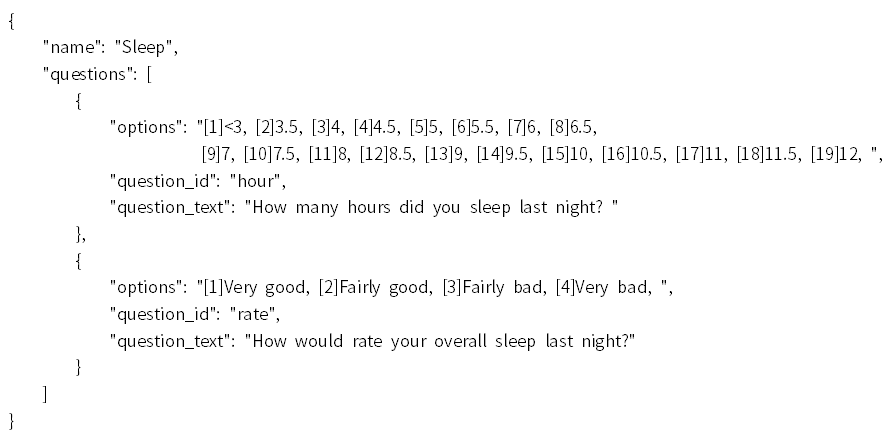

In [8]:
# 아래 설명을 기반으로 Sleep EMA 데이터 추출을 위한 코드를 작성하세요.

################################################################

# 1. json load를 통해서 sleep에 저장된 파일을 하나씩 로드한다.
# 2. 유저의 응답 중 'question_id'가 'hour','rate'인 데이터를 파싱한다.
# 3. 이때, 각 응답은 인덱스 값이므로 해당 인덱스에 대응되는 실제 값으로 변환한다.

# Hint1) 응답결과가 없으면 NaN이 된다. 해당 데이터는 추후 Imputer를 통해 처리한다.

# Hint2) How many hours did you sleep last night?
# [1] -> 3, [2]->3.5, [3]->4.0, [4]->4.5 , ... , [18]->11.5, [19]->12

# Hint3) Sleep_rate
# [1] -> 4, [2]->3, [3]->2, [4]->1

# Hint4) 만약 대응되는 인덱스가 없거나 대응되는 답변이 없다면 해당 데이터는 'NaN'으로 설정한다.

################################################################

# Hint5) 아래 예시코드를 활용하여 작성할 수 있다.

people_hour = list()
people_rate = list()

hour_choice_set = [str(x) for x in range(1, 20)]  # sleep의 'hour' 질문 셋 미리 선언
rate_choice_set = [str(x) for x in range(1, 5)]  # sleep의 'rate' 질문 셋 미리 선언

for sp in tqdm(sleep):
    person_hour = list()
    person_rate = list()

    with open(sp) as json_file:
        sleep_data = json.load(json_file)

    for res in sleep_data:
        if 'hour' in res:
            if res['hour'] in hour_choice_set:
                # 'hour' 질문은 int(응답) * 0.5 + 2.5로 값 계산
                person_hour.append(int(res['hour']) * 0.5 + 2.5)
            else:
                person_hour.append('NaN')
        if 'rate' in res:
            if res['hour'] in hour_choice_set:
                # 'hour' 질문은 int(응답) * 0.5 + 2.5로 값 계산
                person_rate.append((int(res['rate']) - 5) * -1)
            else:
                person_rate.append('NaN')

    people_hour.append(person_hour)
    people_rate.append(person_rate)


100%|██████████| 46/46 [00:00<00:00, 7078.21it/s]


# [Empty Module #1-2] EMA데이터 파싱 - Social  

목표: 아래 설문항목에 응답한 user의 EAM 결과를 적절한 인덱스에 대응되는 데이터를 파싱한다.

```
[input]
--------------
- json : User의 EMA 응답 결과(Index)가 담긴 json파일

[output]
--------------
- raw data : 대응되는 Index의 값을 추출한 데이터
    
```

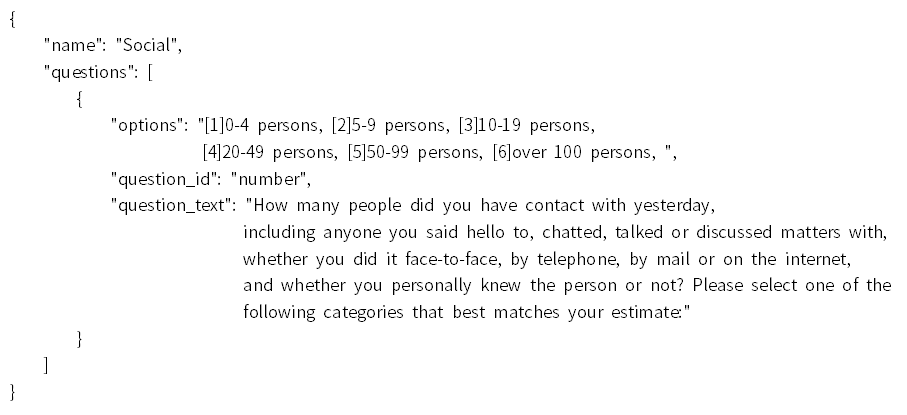

In [9]:
# 아래 설명을 기반으로 Social EMA 데이터 추출을 위한 코드를 작성하세요.

################################################################

# 1. json load를 통해서 sleep에 저장된 파일을 하나씩 로드한다.
# 2. 유저의 응답 중 'question_id'가 'number'인 데이터를 파싱한다.
# 3. 이때, 각 응답은 인덱스 값이므로 해당 인덱스에 대응되는 실제 값으로 변환한다.

# Hint1) 응답결과가 없으면 NaN이 된다. 해당 데이터는 추후 Imputer를 통해 처리한다.

# Hint2) Social
# [1]->0, [2]->5, [3]->10, [4]->20, [5]->50, [6]->100

# Hint3) 만약 대응되는 인덱스가 없거나 대응되는 답변이 없다면 해당 데이터는 'NaN'으로 설정한다.

################################################################

# Hint4) 아래 예시코드를 활용하여 작성할 수 있다.

people_contact = list()


social_answer_set = [0, 5, 10, 20, 50, 100]  # social 정답 셋 미리 선언
social_choice_set = [str(x) for x in range(1, 7)]  # social 질문 셋 미리 선언

for soc in tqdm(social):
    person_contact = list()
    with open(soc) as json_file:
        social_data = json.load(json_file)
    for res in social_data:
        if 'number' in res:
            if res['number'] in social_choice_set:
                person_contact.append(
                    social_answer_set[int(res['number']) - 1])  # 질문 데이터 파싱
            else:
                person_contact.append('NaN')
    people_contact.append(person_contact)


100%|██████████| 46/46 [00:00<00:00, 8098.47it/s]


# [Empty Module #1-3] EMA데이터 파싱 - Activity  

목표: 아래 설문항목에 응답한 user의 EAM 결과를 적절한 인덱스에 대응되는 데이터를 파싱한다.

```
[input]
--------------
- json : User의 EMA 응답 결과(Index)가 담긴 json파일

[output]
--------------
- raw data : 대응되는 Index의 값을 추출한 데이터
    
```

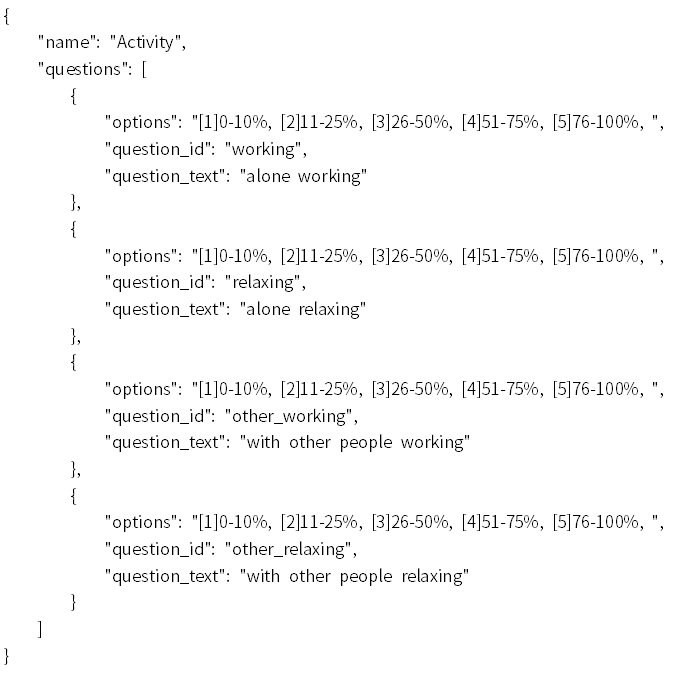

In [10]:
# 아래 설명을 기반으로 Activity EMA 데이터 추출을 위한 코드를 작성하세요.

################################################################

# 1. json load를 통해서 sleep에 저장된 파일을 하나씩 로드한다.
# 2. 유저의 응답 중 'question_id'가 'other_relaxing','other_working',
#                                 'relaxing','working'인 데이터를 파싱한다.
# 3. 이때, 각 응답은 인덱스 값이므로 해당 인덱스에 대응되는 실제 값으로 변환한다.

# Hint1) 응답결과가 없으면 NaN이 된다. 해당 데이터는 추후 Imputer를 통해 처리한다.

# Hint2) Activity
# [1]->0, [2]->0.11, [3]->0.26, [4]->0.51, [5]->0.76

# Hint3) 만약 대응되는 인덱스가 없거나 대응되는 답변이 없다면 해당 데이터는 'NaN'으로 설정한다.

################################################################

# Hint4) 아래 예시코드를 활용하여 작성할 수 있다.

people_work_alone = list()
people_work_other = list()
people_relaxing_alone = list()
people_relaxing_other = list()

people_answer_set = [0, 0.11, 0.26, 0.51, 0.76]  # activity 정답 셋 미리 선언
people_choice_set = [str(x) for x in range(1, 6)]  # 'activity 정답 셋 미리 선언

for act in tqdm(activity):

    person_work_alone = list()
    person_work_other = list()
    person_relaxing_alone = list()
    person_relaxing_other = list()

    with open(act) as json_file:
        activity_data = json.load(json_file)

    for res in activity_data:

        if 'other_relaxing' in res:
            if res['other_relaxing'] in people_choice_set:
                # other_relaxing 응답 데이터 파싱
                person_relaxing_other.append(people_answer_set[int(
                    res['other_relaxing']) - 1])
            else:
                person_relaxing_other.append('NaN')

        if 'other_working' in res:
            if res['other_working'] in people_choice_set:
                # other_working 응답 데이터 파싱
                person_work_other.append(
                    people_answer_set[int(res['other_working']) - 1])
            else:
                person_work_other.append('NaN')

        if 'relaxing' in res:
            if res['relaxing'] in people_choice_set:
                # relaxing 응답 데이터 파싱
                person_relaxing_alone.append(
                    people_answer_set[int(res['relaxing']) - 1])
            else:
                person_relaxing_alone.append('NaN')

        if 'working' in res:
            if res['working'] in people_choice_set:
                # working 응답 데이터 파싱
                person_work_alone.append(people_answer_set[int(
                    res['working']) - 1])
            else:
                person_work_alone.append('NaN')

    people_relaxing_other.append(person_relaxing_other)
    people_work_other.append(person_work_other)
    people_relaxing_alone.append(person_relaxing_alone)
    people_work_alone.append(person_work_alone)


100%|██████████| 46/46 [00:00<00:00, 7921.25it/s]


## 데이터 전처리

- 앞서 알맞게 데이터를 파싱했다면 아래 부분은 해당 데이터를 기반으로 Feature를 추출하기 위한 준비 단계입니다.
- 데이터는 아래 단계의 전처리 과정을 거칩니다.
    1. 데이터의 형을 float 형으로 변환
    2. 데이터를 pandas의 DataFrame으로 변환
    3. train/test 데이터 셋을 분리하기 위하여 데이터를 구분하기 위해, DataFrame의 첫번째 column에 user_id 컬럼을 추가
- 3가지 카테고리(Sleep, Social, Activity)의 7가지 데이터에 대해 위의 과정을 모두 수행해줍니다.

In [11]:
student_sleep = pd.DataFrame(people_hour).astype('float64')
student_sleep_rate = pd.DataFrame(people_rate).astype('float64')
student_contact = pd.DataFrame(people_contact).astype('float64')
student_working_alone = pd.DataFrame(people_work_alone).astype('float64')
student_working_other = pd.DataFrame(people_work_other).astype('float64')
student_relaxing_alone = pd.DataFrame(people_relaxing_alone).astype('float64')
student_relaxing_other = pd.DataFrame(people_relaxing_other).astype('float64')

student_sleep['uid'] = total_user
student_sleep_rate['uid'] = total_user
student_contact['uid'] = total_user
student_working_alone['uid'] = total_user
student_working_other['uid'] = total_user
student_relaxing_alone['uid'] = total_user
student_relaxing_other['uid'] = total_user

student_sleep = student_sleep[(['uid']+list(range(0,student_sleep.shape[1]-1)))]
student_sleep_rate = student_sleep_rate[(['uid']+list(range(0,student_sleep_rate.shape[1]-1)))]
student_contact = student_contact[(['uid']+list(range(0,student_contact.shape[1]-1)))]
student_working_alone = student_working_alone[(['uid']+list(range(0,student_working_alone.shape[1]-1)))]
student_working_other = student_working_other[(['uid']+list(range(0,student_working_other.shape[1]-1)))]
student_relaxing_alone = student_relaxing_alone[(['uid']+list(range(0,student_relaxing_alone.shape[1]-1)))]
student_relaxing_other = student_relaxing_other[(['uid']+list(range(0,student_relaxing_other.shape[1]-1)))]

# [Empty Module #2-1] Feature extract

목표: 앞서 파싱한 EMA 응답 데이터에서 통계적 feature를 추출한다. 

- 앞서 추가한 user_id(이하 uid)를 기준으로 trian/test 유저에 데이터를 나눈다. 그리고 해당 유저의 데이터를 pandas에서 제공하는 describe 함수를 이용해 통계적 feature를 추출한다. 
- 학습에 사용할 통계적 feature는 총 7차원이며 각 구성은 아래 추가설명과 같다. (describe 함수의 가장 첫번째 column인 count는 [Empty Module #3-1]에서 제거함.)

[추가설명]

이때, pandas의 describe 함수는 다음과 같이 구성된다. ([설명링크](https://www.javatpoint.com/pandas-dataframe-describe))

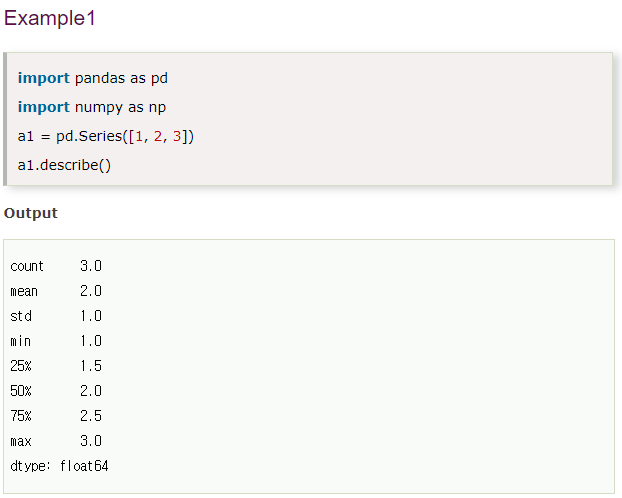

In [12]:
# train셋에 대한 feature를 추출하시오.

################################################################

# 1. train_user에 해당하는 데이터만 파싱한다.
# 2. pandas의 describe 함수를 이용해 feature를 추출한다.

################################################################

# 힌트 1)
# A[A['uid'].isin(train_user)]
# 힌트 2)
# Feature에는 uid 값이 포함되면 안됩니다.
# 힌트 3)
# A.T.describe().to_numpy()

################################################################

# pd.DataFrame().describe() 를 활용한 통계적 feature 추출
# uid값은 제거

train_features_student_sleep = student_sleep[student_sleep['uid'].isin(
    train_user)].drop('uid', axis=1).T.describe()
train_features_student_sleep_rate = student_sleep_rate[student_sleep_rate['uid'].isin(
    train_user)].drop('uid', axis=1).T.describe()
train_features_student_contact = student_contact[student_contact['uid'].isin(
    train_user)].drop('uid', axis=1).T.describe()
train_features_student_working_alone = student_working_alone[student_working_alone['uid'].isin(
    train_user)].drop('uid', axis=1).T.describe()
train_features_student_working_other = student_working_alone[student_working_other['uid'].isin(
    train_user)].drop('uid', axis=1).T.describe()
train_features_student_relaxing_alone = student_relaxing_alone[student_relaxing_alone['uid'].isin(
    train_user)].drop('uid', axis=1).T.describe()
train_features_student_relaxing_other = student_relaxing_other[student_relaxing_other['uid'].isin(
    train_user)].drop('uid', axis=1).T.describe()


In [13]:
# test셋에 대한 feature를 추출하시오.

################################################################

# 1. test_user에 해당하는 데이터만 파싱한다.
# 2. pandas의 describe 함수를 이용해 feature를 추출한다.

################################################################

# 힌트 1)
# A[A['uid'].isin(test_user)]
# 힌트 2)
# Feature에는 uid 값이 포함되면 안됩니다.
# 힌트 3)
# A.T.describe().to_numpy()

################################################################

# pd.DataFrame().describe() 를 활용한 통계적 feature 추출
# uid값은 제거

test_features_student_sleep = student_sleep[student_sleep['uid'].isin(
    test_user)].drop('uid', axis=1).T.describe()
test_features_student_sleep_rate = student_sleep_rate[student_sleep_rate['uid'].isin(
    test_user)].drop('uid', axis=1).T.describe()
test_features_student_contact = student_contact[student_contact['uid'].isin(
    test_user)].drop(['uid'], axis=1).T.describe()
test_features_student_working_alone = student_working_alone[student_working_alone['uid'].isin(
    test_user)].drop('uid', axis=1).T.describe()
test_features_student_working_other = student_working_alone[student_working_other['uid'].isin(
    test_user)].drop('uid', axis=1).T.describe()
test_features_student_relaxing_alone = student_relaxing_alone[student_relaxing_alone['uid'].isin(
    test_user)].drop('uid', axis=1).T.describe()
test_features_student_relaxing_other = student_relaxing_alone[student_relaxing_other['uid'].isin(
    test_user)].drop('uid', axis=1).T.describe()


# [Empty Module #2-2] Feature에서 Nan값 처리하기

- 데이터에 NaN값을 Imputer를 통해서 채운다. 하지만 우울증의 경우 소수의 데이터를 제외한 나머지를 NaN으로 채우면 실제 일부 우울증 패턴이 없어질 수 있다. 따라서 describe를 통해 추출한 Feature에 대해서 Nan에 값이 있을 경우에 Imputer를 통해 NaN을 채운다.

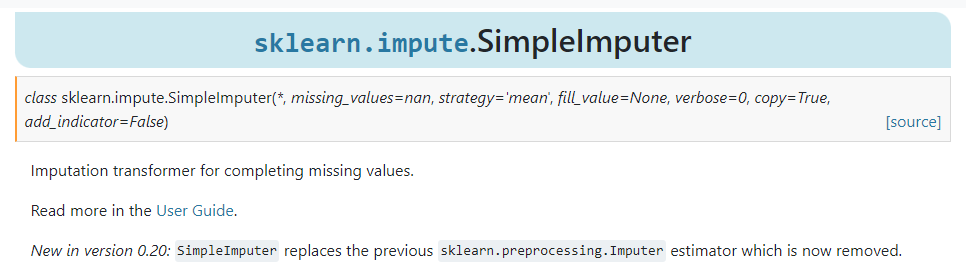

In [14]:
# Imputer를 이용해 Nan 데이터 평균값으로 채우기
from sklearn.impute import SimpleImputer

################################################################

# Hint 1)
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit(A)
# A = imp_mean.transform(A)
# B = imp_mean.transform(B)

################################################################
# 각 feature값들에 존재하는 NaN값들을 mean값으로 채워줌

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

train_features_student_sleep = imp_mean.fit_transform(
    train_features_student_sleep)
test_features_student_sleep = imp_mean.transform(test_features_student_sleep)

train_features_student_sleep_rate = imp_mean.fit_transform(
    train_features_student_sleep_rate)
test_features_student_sleep_rate = imp_mean.transform(
    test_features_student_sleep_rate)

train_features_student_contact = imp_mean.fit_transform(
    train_features_student_contact)
test_features_student_contact = imp_mean.transform(
    test_features_student_contact)

train_features_student_relaxing_alone = imp_mean.fit_transform(
    train_features_student_relaxing_alone)
test_features_student_relaxing_alone = imp_mean.transform(
    test_features_student_relaxing_alone)

train_features_student_relaxing_other = imp_mean.fit_transform(
    train_features_student_relaxing_other)
test_features_student_relaxing_other = imp_mean.transform(
    test_features_student_relaxing_other)

train_features_student_working_alone = imp_mean.fit_transform(
    train_features_student_working_alone)
test_features_student_working_alone = imp_mean.transform(
    test_features_student_working_alone)

train_features_student_working_other = imp_mean.fit_transform(
    train_features_student_working_other)
test_features_student_working_other = imp_mean.transform(
    test_features_student_working_other)


# [Empty Module #3-1] Sleep feature만 이용하여 우울증 예측하기

- [5주차 실습문제](https://www.kaggle.com/competitions/2022-ml-w5p2)에서 우리는 수면시간에 따른 우울증 예측을 수행하였다.
- 해당 실습 문제에서 train data는 위의 가정을 통해서 가공되어졌다. 실제로 이 과정을 통해 가공되었는지 확인하기위해 앞에서 구축한 Feature 중 sleep과 관련된 feature만을 사용하여 우울증을 예측한다.
- 분류에는 SVM을 사용하며 주어진 파라미터를 이용하여 분류를 수행한다.

In [15]:
# Sleep feature만 이용해 우울증을 예측한다.

#######################################################################

# 1. [Empty Module #2-1]에서 describe에서 생성한 통계적 feature 중 count는 제외한 나머지를 사용한다.

# Hint 1) 아래 feature를 사용하시오

# train
# train_features_student_sleep
# train_features_student_sleep_rate

# test
# test_features_student_sleep
# test_features_student_sleep_rate

# Hint 2) 예시코드

#  tmp_x = list()
#  tmp_x.append(train_features_student_sleep[1:8,i])
#  tmp_x.append(train_features_student_sleep_rate[1:8,i])
#  X_train.append(tmp_x)

#######################################################################

# 사용할 train_feature 값들 정의
train_features = [
    train_features_student_sleep,
    train_features_student_sleep_rate,
]

# 사용할 test_feature 값들 정의
test_features = [
    test_features_student_sleep,
    test_features_student_sleep_rate,
]

X_train = list()

for i in range(train_features_student_working_alone.shape[1]):
    # count 값을 제외해서 사용
    X_train.append([feature[1:8, i] for feature in train_features])

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_working_alone.shape[1], -1)

X_test = list()

for i in range(test_features_student_working_alone.shape[1]):
    # count 값을 제외해서 사용
    X_test.append([feature[1:8, i] for feature in test_features])

X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_working_alone.shape[1], -1)


In [16]:
# SVM을 이용해 이진분류 수행하기
from sklearn.svm import SVC

#######################################################################

# Hint 1)
# 베이스라인 파라미터는
# kernel = 'linear', C = 1
# 을 사용하였다.

#######################################################################

# 모델 학습 및 예측
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Sleep feature를 이용한 분류결과 확인하기
submit['label'] = y_pred
submit.to_csv("submit_SVC_sleep_features.csv", index=False)


# [Empty Module #3-2] Social feature만 이용하여 우울증 예측하기

- 앞서 수면과 관련된 EMA 데이터를 이용해 우울증을 에측해 성능을 확인했다면, 이제는 Social관련 feature를 이용해 우울증 예측을 진행한다.
- 분류에는 SVM을 사용하며 주어진 파라미터를 이용하여 분류를 수행한다.

In [17]:
# Social feature만 이용해 우울증을 예측한다.

#######################################################################

# 1. [Empty Module #2-1]에서 describe에서 생성한 통계적 feature 중 count는 제외한 나머지를 사용한다.

# Hint 1) 아래 feature를 사용하시오

# train
# train_features_student_contact

# test
# test_features_student_contact

#######################################################################

# 사용할 train_feature 값들 정의
train_features = [
    train_features_student_contact,
]

# 사용할 test_feature 값들 정의
test_features = [
    test_features_student_contact,
]

X_train = list()

for i in range(train_features_student_working_alone.shape[1]):
    # count 값을 제외해서 사용
    X_train.append([feature[1:8, i] for feature in train_features])

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_working_alone.shape[1], -1)

X_test = list()

for i in range(test_features_student_working_alone.shape[1]):
    # count 값을 제외해서 사용
    X_test.append([feature[1:8, i] for feature in test_features])

X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_working_alone.shape[1], -1)


In [18]:
# SVM을 이용해 이진분류 수행하기
from sklearn.svm import SVC

#######################################################################

# Hint 1)
# 베이스라인 파라미터는
# kernel = 'linear', C = 10
# 을 사용하였다.
#######################################################################

# 모델 학습 및 예측
svm = SVC(kernel='linear', C=10)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Sleep feature를 이용한 분류결과 확인하기
submit['label'] = y_pred
submit.to_csv("submit_SVC_sleep_features.csv", index=False)


# [Empty Module #3-3] Activity feature만 이용하여 우울증 예측하기

- 앞서 수면, 활동과 관련된 EMA 데이터를 이용해 우울증을 에측해 성능을 확인했다면, 이제는 Activiy와 관련 feature를 이용해 우울증 예측을 진행한다.
- 분류에는 SVM을 사용하며 주어진 파라미터를 이용하여 분류를 수행한다.

In [19]:
# Activity feature만 이용해 우울증을 예측한다.

#######################################################################

# 1. [Empty Module #2-1]에서 describe에서 생성한 통계적 feature 중 count는 제외한 나머지를 사용한다.

# Hint 1) 아래 feature를 사용하시오

# train
# train_features_student_working_alone
# train_features_student_working_other
# train_features_student_relaxing_alone
# train_features_student_relaxing_other

# test
# test_features_student_working_alone
# test_features_student_working_other
# test_features_student_relaxing_alone
# test_features_student_relaxing_other

#######################################################################

# 사용할 train_feature 값들 정의
train_features = [
    train_features_student_working_alone,
    train_features_student_working_other,
    train_features_student_relaxing_alone,
    train_features_student_relaxing_other,
]

# 사용할 test_feature 값들 정의
test_features = [
    test_features_student_working_alone,
    test_features_student_working_other,
    test_features_student_relaxing_alone,
    test_features_student_relaxing_other,
]

X_train = list()

for i in range(train_features_student_working_alone.shape[1]):
    # count 값을 제외해서 사용
    X_train.append([feature[1:8, i] for feature in train_features])

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_working_alone.shape[1], -1)

X_test = list()

for i in range(test_features_student_working_alone.shape[1]):
    # count 값을 제외해서 사용
    X_test.append([feature[1:8, i] for feature in test_features])

X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_working_alone.shape[1], -1)


In [20]:
# SVM을 이용해 이진분류 수행하기
from sklearn.svm import SVC

#######################################################################

# Hint 1)
# 베이스라인 파라미터는
# kernel = 'linear', C = 1
# 을 사용하였다.

#######################################################################

# 모델 학습 및 예측
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Activity feature를 이용한 분류결과 확인하기
submit['label'] = y_pred
submit.to_csv("submit_SVC_Activity_features.csv", index=False)


# [Empty Module #3-4] 모든 feature를 이용하여 우울증 예측하기

- 앞서 수면, 활동, 사회성과 관련된 EMA 데이터에서 추출한 feature 각각을 이용해 우울증을 분류하였다면, 모든 feautre를 통합하여 분류를 수행한다.
- 분류에는 SVM을 사용하며 주어진 파라미터를 이용하여 분류를 수행한다.

In [21]:
# Sleep + Social + Activity 모두를 이용해 우울증을 예측한다.

#######################################################################

# 1. [Empty Module #2-1]에서 describe에서 생성한 통계적 feature 중 count는 제외한 나머지를 사용한다.

# Hint 1) 아래 feature를 사용하시오

# train
# train_features_student_sleep
# train_features_student_sleep_rate
# train_features_student_contact
# train_features_student_working_alone
# train_features_student_working_other
# train_features_student_relaxing_alone
# train_features_student_relaxing_other

# test
# test_features_student_sleep
# test_features_student_sleep_rate
# test_features_student_contact
# test_features_student_working_alone
# test_features_student_working_other
# test_features_student_relaxing_alone
# test_features_student_relaxing_other

#######################################################################
# 사용할 train_feature 값들 정의
# 사용할 test_feature 값들 정의

train_features = [
    train_features_student_sleep,
    train_features_student_sleep_rate,
    train_features_student_contact,
    train_features_student_working_alone,
    train_features_student_working_other,
    train_features_student_relaxing_alone,
    train_features_student_relaxing_other,
]

test_features = [
    test_features_student_sleep,
    test_features_student_sleep_rate,
    test_features_student_contact,
    test_features_student_working_alone,
    test_features_student_working_other,
    test_features_student_relaxing_alone,
    test_features_student_relaxing_other,
]

X_train = list()

for i in range(train_features_student_working_alone.shape[1]):
    # count 값을 제외해서 사용
    X_train.append([feature[1:8, i] for feature in train_features])

X_train = np.array(X_train)
X_train = X_train.reshape(train_features_student_working_alone.shape[1], -1)

X_test = list()

for i in range(test_features_student_working_alone.shape[1]):
    # count 값을 제외해서 사용
    X_test.append([feature[1:8, i] for feature in test_features])

X_test = np.array(X_test)
X_test = X_test.reshape(test_features_student_working_alone.shape[1], -1)


In [22]:
# SVM을 이용해 이진분류 수행하기
from sklearn.svm import SVC

#######################################################################

# Hint 1)
# 베이스라인 파라미터는
# kernel = 'linear', C = 1
# 을 사용하였다.

#######################################################################

# 모델 학습 및 예측
svm = SVC(class_weight='balanced', kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Sleep+Activity+Social feature를 이용한 분류결과 확인하기
submit['label'] = y_pred
submit.to_csv("submit2.csv", index=False)


# 결론

- 다양한 EMA 데이터를 통해 추출한 Feature를 융합해서 사용하면 더 좋은 성능으로 우울증 분류가 가능함을 확인할 수 있다. 이를 통해서 실제 Feature representation에 따른 성능차이를 확인할 수 있다.

## 추가실험

- 해당 데이터셋은 데이터 imbalnce 문제가 심각하다. 따라서 이를 해결하기 위한 방법을 추가적으로 사용하여 성능을 향상시킬 수 있다.
- 현재 스켈레톤 코드에서는 사용하지 않는 'Stress', 'Exercise'에 대한 EMA 데이터도 제공한다. 이를 추가적으로 이용하여 성능응 향상시킬 수 있다.



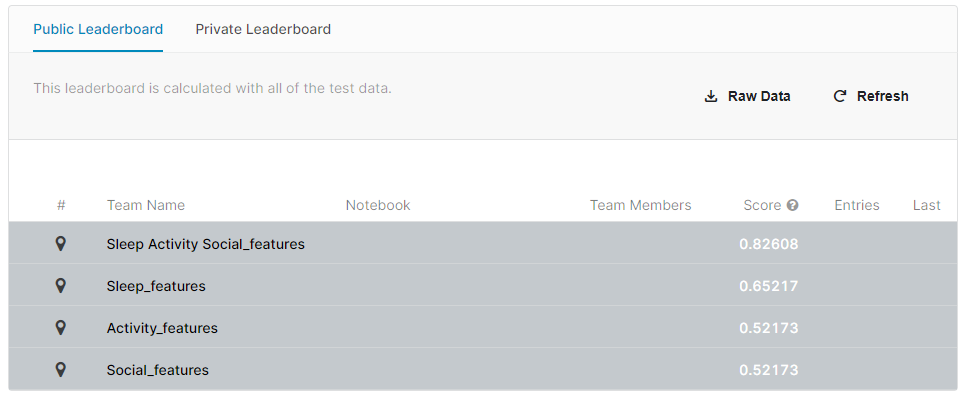